In [ ]:
# source:
# https://data.cityofnewyork.us/Environment/Air-Quality/c3uy-2p5r

# DISCLAIMER:
# the api dataset and the downloadable csv are different:
# api df: contains less information (e.g. df['name'].unique())
# column names are different
# 1,000 rows vs 14,289

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
# the api dataset

df = pd.read_csv('https://data.cityofnewyork.us/resource/c3uy-2p5r.csv')
df.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,message
0,333939,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Winter 2014-15,2014-12-01T00:00:00.000,10.21,NaN
1,547354,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Annual Average 2017,2017-01-01T00:00:00.000,7.72,NaN
2,605650,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Winter 2017-18,2017-12-01T00:00:00.000,8.28,NaN
3,179503,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Winter 2010-11,2010-12-01T00:00:00.000,13.85,NaN
4,179643,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Annual Average 2009,2008-12-01T00:00:00.000,11.05,NaN


In [3]:
df['name'].unique()

array(['Fine Particulate Matter (PM2.5)', 'Ozone (O3)'], dtype=object)

In [4]:
df.shape

(1000, 12)

In [5]:
# downloaded csv

df_air = pd.read_csv('Air_Quality.csv')
df_air.columns = df_air.columns.str.replace(' ', '')
df_air = df_air.drop(columns=['Message']) # all are NaNs
df_air.head()

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,TimePeriod,Start_Date,DataValue
0,333939,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Winter 2014-15,12/01/2014,10.21
1,547354,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Annual Average 2017,01/01/2017,7.72
2,605650,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Winter 2017-18,12/01/2017,8.28
3,179503,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Winter 2010-11,12/01/2010,13.85
4,179643,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Annual Average 2009,12/01/2008,11.05


In [6]:
df_air.shape

(14289, 11)

In [7]:
df_air.Name.unique()

array(['Fine Particulate Matter (PM2.5)', 'Ozone (O3)',
       'Sulfur Dioxide (SO2)', 'Nitrogen Dioxide (NO2)',
       'PM2.5-Attributable Deaths',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Traffic Density- Annual Vehicle Miles Traveled',
       'Traffic Density- Annual Vehicle Miles Traveled for Cars',
       'Traffic Density- Annual Vehicle Miles Traveled for Trucks',
       'Air Toxics Concentrations- Average Benzene Concentrations',
       'Air Toxics Concentrations- Average Formaldehyde Concentrations',
       'PM2.5-Attributable Asthma Emergency Department Visits',
       'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)',
       'O3-Attributable Cardiac and Respiratory Deaths',
       'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)',
       'O3-Attributable Asthma Emergency Department Visits',
       'O3-Attributa

In [8]:
df_air.TimePeriod.unique()

array(['Winter 2014-15', 'Annual Average 2017', 'Winter 2017-18',
       'Winter 2010-11', 'Annual Average 2009', 'Annual Average 2010',
       'Summer 2009', 'Annual Average 2011', 'Winter 2013-14',
       'Annual Average 2015', 'Winter 2015-16', 'Annual Average 2016',
       'Annual Average 2018', 'Summer 2018', 'Annual Average 2014',
       'Winter 2009-10', 'Winter 2011-12', 'Winter 2012-13',
       'Summer 2015', 'Summer 2016', 'Winter 2016-17', 'Summer 2010',
       'Annual Average 2013', 'Summer 2013', 'Summer 2014', 'Summer 2017',
       'Annual Average 2012', 'Winter 2008-09', 'Summer 2011',
       'Summer 2012', '2-Year Summer Average 2009-2010', '2015-2017',
       '2009-2011', '2012-2014', '2005-2007', '2013', '2015', '2016',
       '2005', '2011'], dtype=object)

In [9]:
# check timeperiod availability for each Name
for i in df_air.Name.unique():
    print('{} unique timeperiod: {}\n'.format(i, df_air.loc[(df_air.Name == i)].TimePeriod.unique()))

Fine Particulate Matter (PM2.5) unique timeperiod: ['Winter 2014-15' 'Annual Average 2017' 'Winter 2017-18' 'Winter 2010-11'
 'Annual Average 2009' 'Annual Average 2010' 'Summer 2009'
 'Annual Average 2011' 'Winter 2013-14' 'Annual Average 2015'
 'Winter 2015-16' 'Annual Average 2016' 'Annual Average 2018'
 'Summer 2018' 'Annual Average 2014' 'Winter 2009-10' 'Winter 2011-12'
 'Winter 2012-13' 'Summer 2015' 'Summer 2016' 'Winter 2016-17'
 'Summer 2010' 'Annual Average 2013' 'Summer 2013' 'Summer 2014'
 'Summer 2017' 'Annual Average 2012' 'Winter 2008-09' 'Summer 2011'
 'Summer 2012']

Ozone (O3) unique timeperiod: ['Summer 2018' 'Summer 2012' 'Summer 2013' 'Summer 2017' 'Summer 2011'
 'Summer 2015' 'Summer 2009' 'Summer 2014' 'Summer 2016' 'Summer 2010'
 '2-Year Summer Average 2009-2010']

Sulfur Dioxide (SO2) unique timeperiod: ['Winter 2014-15' 'Winter 2011-12' 'Winter 2015-16' 'Winter 2012-13'
 'Winter 2013-14' 'Winter 2008-09' 'Winter 2009-10' 'Winter 2010-11']

Nitrogen Dioxide (N

In [10]:
# FILTERS

# timeperiod
time_AnnualAvg = (df_air.TimePeriod.str.contains('Annual Average'))
time_seasonal = (df_air.TimePeriod.str.contains('Winter')) | (df_air.TimePeriod.str.contains('Summer'))
#time_years = (df_air.TimePeriod.str.len() == 4)

# geolocation
geo_cd = (df_air['GeoTypeName'] == 'CD')

In [11]:
# FILTERED DATAFRAMES

df_annual_cd = df_air.loc[time_AnnualAvg & geo_cd] # annual & cd
df_seasonal_cd = df_air.loc[time_seasonal & geo_cd] # seasonal & cd

## Annual avg, CD


It only contains information for:
- Fine Particulate Matter (PM2.5)
- Nitrogen Dioxide (NO2)

In [12]:
df_annual_cd.Name.unique()

array(['Fine Particulate Matter (PM2.5)', 'Nitrogen Dioxide (NO2)'],
      dtype=object)

In [13]:
# clean time column

df_annual_cd.TimePeriod = df_annual_cd.TimePeriod.apply(lambda x: x.replace('Annual Average ', ''))
df_annual_cd.TimePeriod = pd.to_numeric(df_annual_cd.TimePeriod, errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
# DIVIDE BY TYPE
df_pm25 = df_annual_cd[(df_annual_cd.Name == 'Fine Particulate Matter (PM2.5)')] # pm2.5
df_no2 = df_annual_cd[(df_annual_cd.Name == 'Nitrogen Dioxide (NO2)')] # NO2

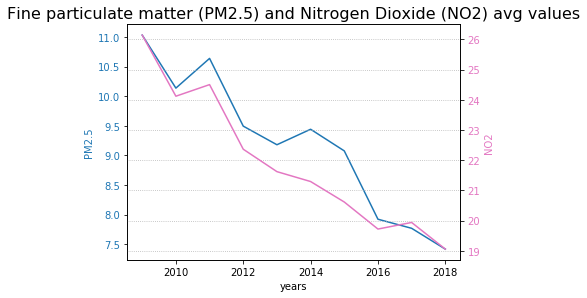

In [15]:
# group
df_pm25_grouped = df_pm25[['TimePeriod', 'DataValue']].groupby(by='TimePeriod').mean()
df_no2_grouped = df_no2[['TimePeriod', 'DataValue']].groupby(by='TimePeriod').mean()

# PLOT
fig, ax1 = plt.subplots()

color_PM25 = 'tab:blue'
ax1.set_xlabel('years')
ax1.set_ylabel('PM2.5', color=color_PM25)
ax1.plot(df_pm25_grouped.index, df_pm25_grouped.DataValue, color=color_PM25)
ax1.tick_params(axis='y', labelcolor=color_PM25)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color_NO2 = 'tab:pink'
ax2.set_ylabel('NO2', color=color_NO2)  # we already handled the x-label with ax1
ax2.plot(df_no2_grouped.index, df_no2_grouped.DataValue, color=color_NO2)
ax2.tick_params(axis='y', labelcolor=color_NO2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Fine particulate matter (PM2.5) and Nitrogen Dioxide (NO2) avg values', fontsize=16)
plt.grid(linestyle='dotted')
plt.show()

### Shapefile & map

In [11]:
cd = gpd.read_file('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/CUSP2021ADS-Team-main/data/shp/nycd.shp')
cd.head()

,BoroCD,Shape_Leng,Shape_Area,geometry
0,101,74168.587892,4.268912e+07,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,102,34130.595277,3.768921e+07,"POLYGON ((985125.733 207917.071, 986018.960 20..."
2,103,30695.640963,4.687978e+07,"POLYGON ((992073.467 203714.076, 992068.667 20..."
3,104,67623.669901,4.931172e+07,"POLYGON ((985929.324 220967.002, 985995.954 22..."
4,105,35288.188510,4.379033e+07,"POLYGON ((991725.244 217725.299, 992169.505 21..."


In [63]:
# pm25
cd_df_pm25 = df_pm25.merge(cd,left_on='GeoJoinID',right_on='BoroCD',how='left')
cd_df_pm25 = GeoDataFrame(cd_df_pm25) # convert to geodataframe
type(cd_df_pm25)

geopandas.geodataframe.GeoDataFrame

In [69]:
# df_no2
cd_df_no2 = df_no2.merge(cd,left_on='GeoJoinID',right_on='BoroCD',how='left')
cd_df_no2 = GeoDataFrame(cd_df_no2) # convert to geodataframe

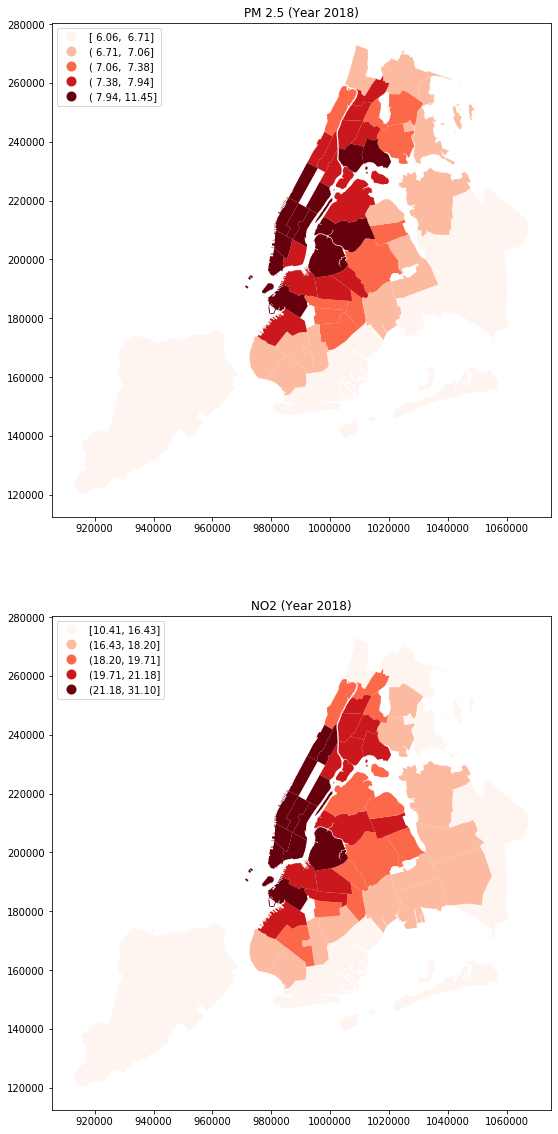

In [106]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,20))

color = 'Reds'
#color = 'RdYlGn'
cd_df_pm25[cd_df_pm25.TimePeriod==2018].plot(ax=ax[0], column='DataValue', k=5, scheme='Quantiles', cmap = color, legend=True, 
              legend_kwds={'loc': 'upper left'})
cd_df_no2[cd_df_no2.TimePeriod==2018].plot(ax=ax[1], column='DataValue', k=5, scheme='Quantiles', cmap = color, legend=True, 
              legend_kwds={'loc': 'upper left'})

ax[0].set_title('PM 2.5 (Year 2018)')
ax[1].set_title('NO2 (Year 2018)')

plt.show()

## Seasonal, CD

It contains information about:
- Fine Particulate Matter (PM2.5)
- Ozone (O3)
- Nitrogen Dioxide (NO2),
- Sulfur Dioxide (SO2)

In [236]:
df_seasonal_cd.Name.unique()

array(['Fine Particulate Matter (PM2.5)', 'Ozone (O3)',
       'Nitrogen Dioxide (NO2)', 'Sulfur Dioxide (SO2)'], dtype=object)

In [237]:
df_seasonal_cd.TimePeriod.unique()

array(['Summer 2013', 'Winter 2016-17', 'Summer 2018', 'Winter 2009-10',
       'Winter 2012-13', 'Summer 2009', 'Summer 2010', 'Winter 2010-11',
       'Summer 2015', 'Winter 2014-15', 'Winter 2015-16',
       'Winter 2011-12', 'Summer 2012', 'Summer 2016', 'Summer 2017',
       'Winter 2017-18', 'Winter 2008-09', 'Summer 2011',
       'Winter 2013-14', 'Summer 2014', '2-Year Summer Average 2009-2010'],
      dtype=object)

In [238]:
len(df_seasonal_cd.loc[(df_seasonal_cd.TimePeriod == '2-Year Summer Average 2009-2010')])

59

In [239]:
# erase 2-year-summer... 
sanityindex = (df_seasonal_cd.TimePeriod == '2-Year Summer Average 2009-2010')
df_seasonal_cd = df_seasonal_cd.loc[~sanityindex]

In [240]:
# clean time column
# question: what winter year should we take? (format: winter 2016-17)

df_seasonal_cd['Season'] = df_seasonal_cd['TimePeriod'].str.split(' ').str[0]
df_seasonal_cd['Year'] = df_seasonal_cd['TimePeriod'].str.split(' ').str[1]
df_seasonal_cd['Year2'] = df_seasonal_cd['Year'].str[:4]
df_seasonal_cd['Year2'] = pd.to_numeric(df_seasonal_cd['Year2'], errors='coerce')

df_seasonal_cd.head()

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,TimePeriod,Start_Date,DataValue,Season,Year,Year2
253,169573,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),Summer 2013,06/01/2013,9.13,Summer,2013,2013
259,547775,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),Winter 2016-17,12/01/2016,6.87,Winter,2016-17,2016
260,606069,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),Summer 2018,06/01/2018,7.36,Summer,2018,2018
261,168511,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),Winter 2009-10,12/01/2009,9.07,Winter,2009-10,2009
262,168688,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,503,Tottenville and Great Kills (CD3),Winter 2012-13,12/01/2012,9.60,Winter,2012-13,2012


In [241]:
# DIVIDE BY TYPE

df_s_PM25 = df_seasonal_cd[(df_seasonal_cd.Name == 'Fine Particulate Matter (PM2.5)')] # pm2.5
df_s_NO2 = df_seasonal_cd[(df_seasonal_cd.Name == 'Nitrogen Dioxide (NO2)')] # NO2
df_s_O3 = df_seasonal_cd[(df_seasonal_cd.Name == 'Ozone (O3)')] # 03 only summer
df_s_SO2 = df_seasonal_cd[(df_seasonal_cd.Name == 'Sulfur Dioxide (SO2)')] # SO2 only winter

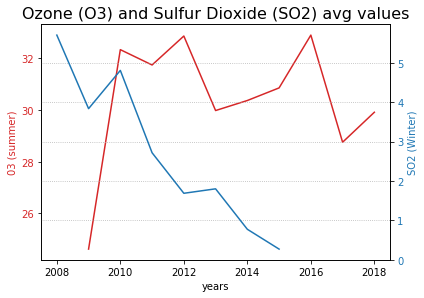

In [242]:
# grouped
df_s_O3_grouped = df_s_O3[['Year2', 'DataValue']].groupby(by='Year2').mean()
df_s_SO2_grouped = df_s_SO2[['Year2', 'DataValue']].groupby(by='Year2').mean()

# PLOT
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('years')
ax1.set_ylabel('03 (summer)', color=color)
ax1.plot(df_s_O3_grouped.index, df_s_O3_grouped.DataValue, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SO2 (Winter)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_s_SO2_grouped.index, df_s_SO2_grouped.DataValue, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Ozone (O3) and Sulfur Dioxide (SO2) avg values', fontsize=16)
plt.grid(linestyle='dotted')
plt.show()

In [243]:
df_s_PM25_grouped_summer = df_s_PM25[(df_s_PM25.Season == 'Summer')][['Year2', 'DataValue']].groupby(by='Year2').mean()
df_s_PM25_grouped_winter = df_s_PM25[(df_s_PM25.Season == 'Winter')][['Year2', 'DataValue']].groupby(by='Year2').mean()

df_s_NO2_grouped_summer = df_s_NO2[(df_s_NO2.Season == 'Summer')][['Year2', 'DataValue']].groupby(by='Year2').mean()
df_s_NO2_grouped_winter = df_s_NO2[(df_s_NO2.Season == 'Winter')][['Year2', 'DataValue']].groupby(by='Year2').mean()

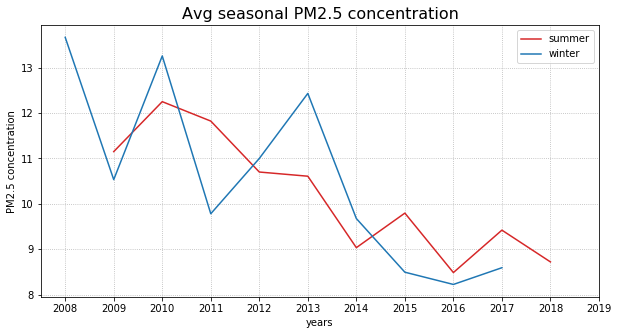

In [244]:
plt.figure(figsize=(10,5))
plt.plot(df_s_PM25_grouped_summer.index, df_s_PM25_grouped_summer.DataValue, color='tab:red', label='summer')
plt.plot(df_s_PM25_grouped_winter.index, df_s_PM25_grouped_winter.DataValue, color='tab:blue', label= 'winter')

plt.xticks(range(2008,2020))
plt.xlabel('years')
plt.ylabel('PM2.5 concentration')
plt.title('Avg seasonal PM2.5 concentration', fontsize=16)
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

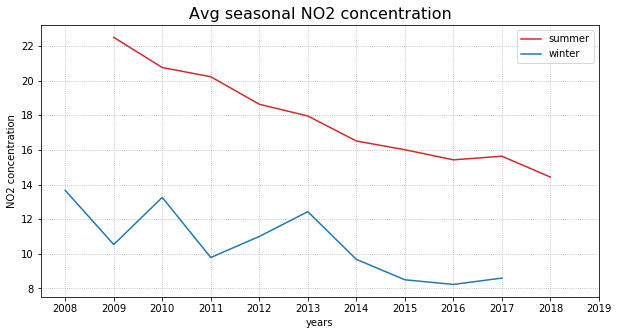

In [245]:
plt.figure(figsize=(10,5))
plt.plot(df_s_NO2_grouped_summer.index, df_s_NO2_grouped_summer.DataValue, color='tab:red', label='summer')
plt.plot(df_s_PM25_grouped_winter.index, df_s_PM25_grouped_winter.DataValue, color='tab:blue', label= 'winter')

plt.xticks(range(2008,2020))
plt.xlabel('years')
plt.ylabel('NO2 concentration')
plt.title('Avg seasonal NO2 concentration', fontsize=16)
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

## Plotting Demographic Data

In [5]:
AQ_311_census =pd.read_csv('AQ_with311_seasonal_CD_census.csv')
AQ_311_census = AQ_311_census.drop(columns=['Unnamed: 0'])

In [6]:
AQ_311_census.columns

Index(['UniqueID', 'IndicatorID', 'Name', 'Measure', 'MeasureInfo',
       'GeoTypeName', 'GeoJoinID', 'GeoPlaceName', 'Year', 'Season',
       'Start_Date', 'DataValue', 'Total AQ Complaints',
       'Air: Dust, Commercial (AE2)',
       'Air: Dust, Construction/Demolition (AE4)',
       'Air: Dust, Other (Use Comments) (AE5)', 'Air: Dust, Residential (AE1)',
       'Air: Odor, Nail Salon (AD8)',
       'Air: Odor, Sweet From Unknown Source (AZ1)',
       'Air: Odor/Fumes, Dry Cleaners (AD1)',
       'Air: Odor/Fumes, Other (Use Comments) (AD6)',
       'Air: Odor/Fumes, Private Carting (AD4)',
       'Air: Odor/Fumes, Restaurant (AD2)',
       'Air: Odor/Fumes, Vehicle Idling (AD3)',
       'Air: Open Fire, Commercial (AC2)',
       'Air: Open Fire, Construction/Demolition (AC4)',
       'Air: Open Fire, Residential (AC1)',
       'Air: Other Air Problem (Use Comments) (AZZ)',
       'Air: Smoke, Chimney or vent (AS1)', 'Air: Smoke, Commercial (AA2)',
       'Air: Smoke, Other (Use C

In [12]:
# df_no2
AQ_311_census_cd = AQ_311_census[['MedHHIncome_19','GeoJoinID']].merge(cd,left_on='GeoJoinID',right_on='BoroCD',how='left')
AQ_311_census_cd = GeoDataFrame(AQ_311_census_cd) # convert to geodataframe

In [15]:
AQ_311_census_cd = AQ_311_census_cd.drop_duplicates()

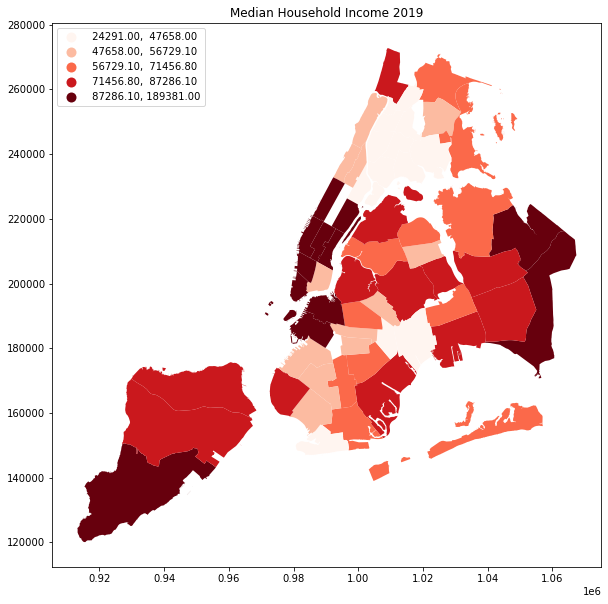

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

color = 'Reds'
#color = 'RdYlGn'
AQ_311_census_cd.plot(ax=ax,column='MedHHIncome_19', k=5, scheme='Quantiles', cmap = color, legend=True, 
              legend_kwds={'loc': 'upper left'})

ax.set_title('Median Household Income 2019')

plt.show()